In [ ]:
# Import all the dependencies
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load the data into the DataFrame
embedded_review_df = pd.read_csv(
    "embedded_review.csv",
    index_col="uniqueID")

# Display sample data
embedded_review_df.head(10)

,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label,0,...,758,759,760,761,762,763,764,765,766,767
uniqueID,,,,,,,,,,,,,,,,,,,,,
95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0,-0.010977,...,-0.416409,-0.364040,-0.036060,0.383963,0.176255,-0.147201,-0.243359,-0.541467,0.062160,0.049585
92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0,0.066320,...,-0.279307,-0.419729,-0.389261,0.328398,0.291834,-0.027217,-0.359790,-0.706709,0.047264,-0.017902
138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0,0.084101,...,-0.232733,-0.031823,-0.032784,0.188440,0.162272,0.363399,-0.096650,-0.693634,-0.024901,0.548486
35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0,0.007820,...,-0.310564,-0.599643,-0.375174,0.309915,0.577983,0.051811,-0.184821,-0.710691,0.065533,0.371945
155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0,-0.193177,...,-0.247983,-0.438636,-0.037911,-0.030183,0.508780,0.064493,-0.205261,-0.527391,-0.101341,0.039573
102654,Aripiprazole,Bipolar Disorde,Abilify changed my life There is hope I was on...,10.0,14-Mar-15,32.0,699.0,0.0,2.0,-0.119553,...,-0.161651,-0.251773,-0.189122,0.322160,0.068519,-0.041542,-0.453984,-0.532892,0.097501,0.364749
74811,Keppra,Epilepsy,I Ve had nothing but problems with the Kepper...,1.0,9-Aug-16,11.0,178.0,2.0,0.0,-0.517118,...,-0.241595,-0.529189,-0.369906,-0.296611,0.412664,0.083731,-0.307652,-0.253354,0.584530,0.253897
29607,Topiramate,Migraine Prevention,I have been on this medication almost 2 weeks ...,9.0,1-Jan-15,19.0,701.0,2.0,2.0,-0.021994,...,0.054256,-0.607935,-0.183919,0.290589,0.242697,0.276179,-0.335925,-0.568984,0.021438,0.348821
75612,Lmethylfolate,Depression,I have taken antidepressants for years with so...,10.0,9-Mar-17,54.0,439.0,1.0,1.0,-0.213055,...,-0.127663,-0.405452,-0.187315,0.217327,0.537645,0.047829,-0.394874,-0.419510,0.159911,0.106303


In [ ]:
# Check for nan values
embedded_review_df.isna().sum()

drugName     0
condition    0
review       0
rating       1
date         1
            ..
763          1
764          1
765          1
766          1
767          1
Length: 777, dtype: int64

In [ ]:
# Drop all nan values
embedded_review_df = embedded_review_df.dropna()

In [ ]:
# dtaframe columns
embedded_review_df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'lengthReview', 'conditionCluster_label', 'drugNameCluster_label', '0',
       ...
       '758', '759', '760', '761', '762', '763', '764', '765', '766', '767'],
      dtype='object', length=777)

In [ ]:
# Retain only the columns containing embeddings, discarding all others
X  = embedded_review_df.drop(columns=['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'lengthReview', 'conditionCluster_label', 'drugNameCluster_label'])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
uniqueID,,,,,,,,,,,,,,,,,,,,,
95260,-0.010977,0.010914,0.200967,-0.229490,-0.535286,0.012419,0.578620,0.578304,-0.176901,-0.332041,...,-0.416409,-0.364040,-0.036060,0.383963,0.176255,-0.147201,-0.243359,-0.541467,0.062160,0.049585
92703,0.066320,0.189584,0.369006,-0.046920,-0.473988,-0.238288,0.341089,0.252703,0.104143,0.059248,...,-0.279307,-0.419729,-0.389261,0.328398,0.291834,-0.027217,-0.359790,-0.706709,0.047264,-0.017902
138000,0.084101,-0.019134,0.294494,0.029783,-0.228783,0.170102,0.185404,0.210424,-0.081424,-0.105462,...,-0.232733,-0.031823,-0.032784,0.188440,0.162272,0.363399,-0.096650,-0.693634,-0.024901,0.548486
35696,0.007820,0.207558,0.179105,-0.210057,-0.197015,0.104799,0.338058,0.038666,0.026772,-0.294704,...,-0.310564,-0.599643,-0.375174,0.309915,0.577983,0.051811,-0.184821,-0.710691,0.065533,0.371945
155963,-0.193177,0.360585,0.448292,-0.253824,-0.532782,0.085381,0.607802,0.260307,-0.136089,-0.218225,...,-0.247983,-0.438636,-0.037911,-0.030183,0.508780,0.064493,-0.205261,-0.527391,-0.101341,0.039573


In [ ]:
# Taking 460 components as the average lenth of review columns is 460
pca_460 = PCA(n_components = 460).fit(X.to_numpy())

print('Variance of first 50 principal components is', np.around(pca_460.explained_variance_,2)[:50])



Variance of first 50 principal components is [3.4  2.72 1.87 1.01 0.91 0.77 0.68 0.61 0.51 0.46 0.41 0.39 0.36 0.32
 0.29 0.28 0.26 0.25 0.23 0.22 0.22 0.21 0.18 0.18 0.17 0.17 0.17 0.15
 0.15 0.14 0.14 0.13 0.13 0.12 0.12 0.12 0.12 0.11 0.11 0.1  0.1  0.1
 0.1  0.1  0.09 0.09 0.09 0.09 0.08 0.08]


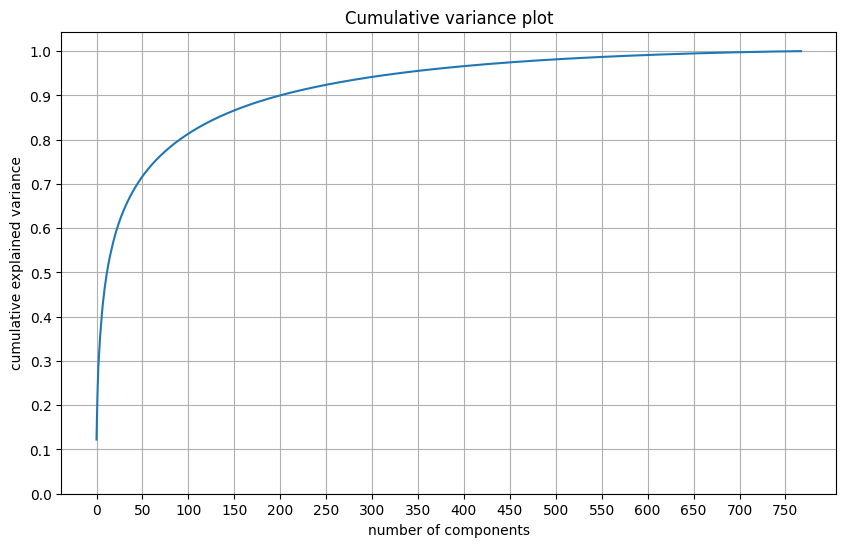

In [ ]:
# Find the PCA with all 768 components
pca_768 = PCA(n_components=768).fit(X.to_numpy())
# Variance Ratio
var_ratio = pca_768.explained_variance_ratio_

# Cumulative variance plot-number of components vs cumulative explained variance
plt.figure(figsize=(10,6))

plt.plot(np.cumsum(var_ratio))

plt.xlabel('number of components')

plt.ylabel('cumulative explained variance')

plt.title('Cumulative variance plot')

plt.yticks(np.arange(0,1.1, 0.1))

plt.xticks(np.arange(0,800, 50))

plt.grid()

In [ ]:
# Components required for various varainces
req_var = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

for var in req_var:
  c = 0
  i = -1
  while c <= var:
    i += 1
    c = c + var_ratio[i]
  print('Number of components to explain', '{:.0f}%'.format(var*100), 'of variance is', '{}'.format(i+1))

Number of components to explain 50% of variance is 13
Number of components to explain 60% of variance is 24
Number of components to explain 70% of variance is 46
Number of components to explain 80% of variance is 92
Number of components to explain 90% of variance is 201
Number of components to explain 95% of variance is 330
Number of components to explain 99% of variance is 585


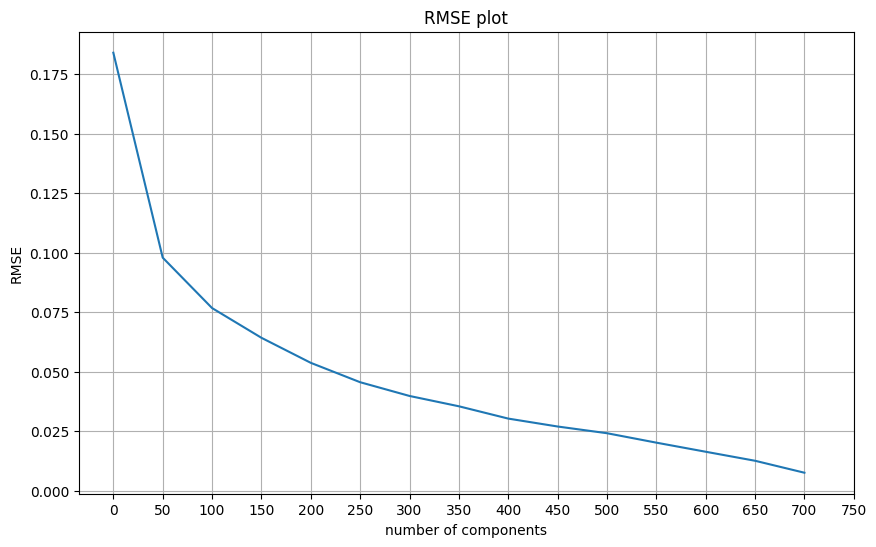

In [ ]:

pca_comps = np.arange(0,750, 50)

rmse_vals = []

for component in pca_comps:
  pca_nm = PCA(n_components=component)

  pca_nm.fit(X.to_numpy())

  X_trans = pca_nm.transform(X.to_numpy()[0].reshape(1, -1))

  recon = pca_nm.inverse_transform(X_trans)

  rmse = mean_squared_error(X.to_numpy()[0], recon[0],squared=False)

  rmse_vals.append(rmse)

# RMSE plot - number of components vs RMSE
plt.figure(figsize=(10,6))

plt.plot(pca_comps, rmse_vals)

plt.xlabel('number of components')

plt.ylabel('RMSE')

plt.title('RMSE plot')

plt.xticks(np.arange(0,800, 50))

plt.grid()

In [ ]:
# PCA for 330 components (95% variance)
pca = PCA(n_components = 330)
output_pca = pca.fit_transform(X.to_numpy())


In [ ]:
# Write into a dataframe
output_pca_df = pd.DataFrame(output_pca)

In [ ]:
# sample PCA components
output_pca_df.head()


,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,1.887339,-0.869075,-2.625546,1.417739,0.745655,-0.639820,-0.805294,-0.375966,0.093337,-0.296511,...,-0.072203,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311
1,-0.000775,0.706566,-0.605744,-1.173229,0.284670,0.259833,0.353663,-0.332351,1.011222,-0.211809,...,0.022241,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458
2,0.710067,1.259798,-1.086482,-0.472165,-1.455680,-0.347598,0.391650,-0.770854,0.003617,0.771463,...,0.100959,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502
3,0.987319,-0.213137,-0.683326,-1.648944,-0.148900,0.311274,0.131049,-0.585099,0.105085,-0.558289,...,0.117297,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703
4,-0.924630,0.702602,0.450114,-0.958159,-0.097065,-1.075369,-0.084259,0.394584,1.019471,1.644853,...,0.064630,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725


In [ ]:
output_pca_df["uniqueID"] = embedded_review_df.index
# Set the uniqueID column as index
output_pca_df.set_index("uniqueID",inplace =True)

# Display sample data
output_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
uniqueID,,,,,,,,,,,,,,,,,,,,,
95260,1.887339,-0.869075,-2.625546,1.417739,0.745655,-0.639820,-0.805294,-0.375966,0.093337,-0.296511,...,-0.072203,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311
92703,-0.000775,0.706566,-0.605744,-1.173229,0.284670,0.259833,0.353663,-0.332351,1.011222,-0.211809,...,0.022241,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458
138000,0.710067,1.259798,-1.086482,-0.472165,-1.455680,-0.347598,0.391650,-0.770854,0.003617,0.771463,...,0.100959,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502
35696,0.987319,-0.213137,-0.683326,-1.648944,-0.148900,0.311274,0.131049,-0.585099,0.105085,-0.558289,...,0.117297,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703
155963,-0.924630,0.702602,0.450114,-0.958159,-0.097065,-1.075369,-0.084259,0.394584,1.019471,1.644853,...,0.064630,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725


In [ ]:
# Get the required columns from embedded_review_df
embedded_review_final_df  = embedded_review_df[['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'lengthReview', 'conditionCluster_label', 'drugNameCluster_label']]
embedded_review_final_df.head()

,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label
uniqueID,,,,,,,,,
95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0
92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0
138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0
35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0
155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0


In [ ]:
# Merge review_reduced_df with embedded_review_final_df using the uniqueID column
review_merged_df = pd.merge(embedded_review_final_df, output_pca_df, on='uniqueID', how='inner')
review_merged_df.head()

,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label,0,...,320,321,322,323,324,325,326,327,328,329
uniqueID,,,,,,,,,,,,,,,,,,,,,
95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0,1.887339,...,-0.072203,0.050732,-0.066741,-0.018283,-0.092436,-0.059485,-0.002017,0.068087,0.062693,0.019311
92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0,-0.000775,...,0.022241,-0.060561,0.042767,0.100795,-0.017772,-0.053921,-0.089212,-0.116708,0.053316,-0.029458
138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0,0.710067,...,0.100959,-0.072072,-0.060204,-0.012960,0.144626,-0.023831,0.137507,-0.030472,-0.074193,0.128502
35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0,0.987319,...,0.117297,0.001229,0.014790,-0.107192,-0.008831,-0.100010,-0.108753,0.033484,0.010719,0.117703
155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0,-0.924630,...,0.064630,0.036089,-0.013739,-0.062118,-0.048534,0.005309,-0.077575,0.146462,-0.013111,-0.208725


In [ ]:
# Save the merged DataFrame to a CSV file in the specified directory
review_merged_df.to_csv(r'C:\Users\Vinaya Kusuma\OneDrive\Documents\embedded_review_reduced.csv')

In [ ]:
  from google.colab import files

  # Save the merged DataFrame to a CSV file
  review_merged_df.to_csv("embedded_review_reduced.csv")

  # Download the CSV file to your local machine
  files.download("embedded_review_reduced.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>